## In this post , I will explain the origin of Poisson Distribution
L Wang


### An ensemble **r** is a triple [ r, A$_{r}$, p(r) ],  where the outcome $r_{b}$ is the value of a random variable **r**,  which takes a set of possible values,  A$_{r}$ = { $r_{1}, r_{2}, r_{3} \cdots r_{b} \cdots  r_{B}  $} and having the probalibites p(r) = { $p_{1}, p_{2}, p_{3} \cdots p_{b} \cdots  p_{B} $}, with p(**r** = r$_{b}$) = p$_b$, p$_b \geq $ 0 and $\sum_{{r_{b} \in A_{r} }} p(r = r_{b})$ = 1.




If the outcomes of **r** have non-negative integers, A$_{r}$ = {$ 0 , 1, 2, 3, 4, 5 \cdots $ } and follow a Poisson distribution with parameter $\lambda (\lambda$ > 0), it can be expressed as



p(r) = $\frac{e^{-\lambda} \lambda^{r}}{r!}$ .


Note that r is also explained as the number of arrivals( counts ) or the occupation number , p(r) is the probability of r events would happen or have already happened .

The poisson distribution can be derived in the following situations.

1. Limit of binomial distribution

Suppose we have **R** hooks in the sea, for each specific hook, a fish is caught or not is a **Bernoulli distribution**, with a probability $\boldsymbol{\rho}$ , we define **r** is the number of hooks which caught fish, this is equivalent to say **r** fish get caught, then **(R-r)** is the number of hooks which didn't catch fish.
Since we are not interested in the sequence of the hook or the fish, then there are $\boldsymbol{\binom{R}{r}}$ number of ways catching fish, the probability that **r** fish is caught can be described as

p($r | R,\rho$) = $\binom{R}{r} \rho^r (1-\rho)^{R-r}$

If we take the limit R $\gg$ 1, $\rho$ decreases at the same time such that $\lambda = R \rho $ remains constant.


p($r | R,\rho) = \frac{R!}{r!(R-r)!}(\frac{\lambda}{R})^r(1-\frac{\lambda}{R})^{R-r}$

with $\lim\limits_{R\gg 1}\frac{R!}{(R-r)!} = \lim\limits_{R\gg 1}R^{\underline{r}} = R^r  $

and $\lim\limits_{R\rightarrow\infty}(1-\frac{\lambda}{R})^{R-r} = \lim\limits_{R\rightarrow\infty} (1-\frac{\lambda}{R})^{R} = e^{-\lambda}$


we obtain the expression of poisson formula
p($r | R,\rho$) =  $\frac{e^{-\lambda} \lambda^{r}}{r!} $ 

    2. Alternatively, one can derive Poisson distribution through waiting-time distribution.

> Reference : Allen Caldwell

Suppose that we would like to model the arrivals of events that happen completely at random ( the probability of an event occuring at any time t after starting observations at t = 0  is independent of the probability of another event occuring at any other time t', no matter how small (t'-t) is ), we divide the macroscopic time interval T into N microscopic intervals $\epsilon$ = T/N, and we assume the rate of arrival is $\omega$. 

In an infinitesimal time interval, $[(n-1)\epsilon, n\epsilon] , \forall n, n = 1,2,3 \cdots $ N. 




p(r=1|$\epsilon, \omega$ ) = $\omega\epsilon$ , the probability one event happens in interval $\epsilon$;
p(r=0|$\epsilon, \omega$ ) = $ 1- \omega\epsilon $, the probability no event happens in interval $\epsilon$;
p(r>1|$\epsilon, \omega$ ) = 0, the probability more than one events happen in interval $\epsilon$.


in other words, each of the interval $\epsilon$ is a Bernoulli process.

We know Poisson distribution follows the property of memorylessness, therefore, the probability of no events happen in interval [0,T) is given by


p(r = 0|T,$\omega) = \prod_{n=1}^{N}p(r=0|\epsilon, \omega ) = p(r=0|\epsilon, \omega )^{N} = (1-\omega\epsilon)^N $



In the limit of large N and infinitesimal $\epsilon$, the no events occure in time interval [0,T) can be reduced to an exponential form.



p(r = 0 | T,$\omega) = \lim\limits_{N\to \infty}(1-\omega\epsilon)^N =  \lim\limits_{N\to \infty}(1-\omega T/N)^N = e^{-\omega T} $



The probability that only one event will arrive within time[0,T) is a product of three components: the probability that nothing happens between [0,(n-1)$\epsilon$),the probability the event occure in $[(n-1)\epsilon, n\epsilon)$, and the final interval [$n\epsilon$, T) with no occurrence.   Since  n $\in (1,2,3 \cdots N)$ 

p(r = 1|T,$\omega) = \sum_{n=1}^{N}p(0|[0,(n-1)\epsilon),\omega)p(1| [(n-1)\epsilon, n\epsilon),\omega)p(0| [n\epsilon, T) ,\omega) = \sum_{n}e^{-\omega(n-1)\epsilon}(\omega\epsilon)e^{-\omega(N-n)\epsilon} = \omega T e^{-\omega T}$



By repeating the same procedure, we obtain   p(r|T,$\omega) = \frac{(\omega T)^r e^{-\omega T}}{r!} = \frac{\lambda^r e^{-\lambda}}{r!}$  .  The **r** arrivals in time interval [0,T) yields a Poisson distribution.

### Below is the code for  poisson process

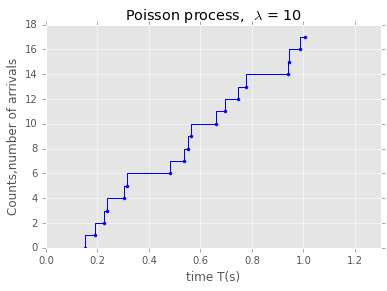

In [27]:
%matplotlib inline

import random
import matplotlib.pyplot as plt
import numpy as np

def poisson(n,tmax):
    lambd= 10
    t =[]
    y =[]
    count =0 
    x_add =0
    while (x_add<tmax):
        y.append(count)   # counts 
        count = count + 1
        x_add = x_add + random.expovariate(lambd)
        t.append(x_add)

    return [t, y]

P = poisson(100,1)

plt.step(P[0],P[1],"b.")
plt.xlabel("time T(s)")
plt.ylabel("Counts,number of arrivals")
plt.title(r"Poisson process,  $\lambda $ = 10")
plt.xlim([0,1.3])
plt.grid(True)
plt.style.use("ggplot")
